In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from IPython.display import HTML

In [2]:
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, precision_score, recall_score
import pandas
import numpy as np
import papermill as pm
import json
import matplotlib.pyplot as plt
import os
import uuid
from db import Result
import ast
import math
from vis.visualization import visualize_cam, visualize_saliency, overlay
from vis.utils.utils import load_img, normalize, find_layer_idx


pandas.options.display.float_format = '{:,.3f}'.format

Using TensorFlow backend.


In [3]:
from evaluate import load, get_results, get_labels, transform_binary_probabilities, transform_binary_predictions, calculate_accuracy_loss, plot_confusion_matrix, plot_precision_recall, plot_roc_curve, calculate_pr_auc, calculate_confusion_matrix_stats, calculate_confusion_matrix, plot_tsne, plot_multiple_grad_cam, plot_precision_recall

In [4]:
from data import data
from run import characterize_data
from config import config

In [5]:
UUID = "a429c738-cb52-417f-ab82-a03c6796a810"

#t1: 4e4c0355-9643-4e22-80ba-78dd371c8900
#t1_t: 7b6d44a6-5439-47d5-a2b9-bf62193c0c2e
#t1_post: 2bcb25f3-b326-4f5b-ae3f-41eb90ae36ef
#t1_post_t: e50a3e1e-d292-4eb8-b152-a9a97238b5cb
#t2: 8c10b503-add4-48a0-92e1-49b156b9fb28
#t2_t: 5b548ac7-508c-41b9-8626-c8b8367e71c9

SELECTIONS = "None"
TSNE_PERPLEXITY = 5

In [6]:
# Parameters
UUID = "b0fb56eb-f2fa-4a5a-bd76-297ec64a371e"
SELECTIONS = "None"
TSNE_PERPLEXITY = "None"


In [7]:
SELECTIONS = eval(SELECTIONS)

In [8]:
result = Result.query.filter(Result.uuid == UUID).first()

In [9]:
print("input form:", result.input_form)

input form: features


In [10]:
MODEL = "{}/models/{}-{}.h5".format(config.OUTPUT, UUID, result.model)

In [11]:
train, validation, test = data(seed=uuid.UUID(result.split_seed), label_form=result.label_form, input_form=result.input_form, train_shuffle=False, test_shuffle=False, validation_shuffle=False, train_augment=False, validation_augment=False, test_augment=False)

  0%|          | 0/332 [00:00<?, ?it/s]

  0%|          | 1/332 [00:00<01:01,  5.35it/s]

  1%|          | 3/332 [00:00<00:49,  6.67it/s]

  2%|▏         | 5/332 [00:00<01:05,  4.98it/s]

  2%|▏         | 6/332 [00:01<00:57,  5.62it/s]

  2%|▏         | 8/332 [00:01<00:45,  7.15it/s]

  3%|▎         | 10/332 [00:01<01:08,  4.69it/s]

  3%|▎         | 11/332 [00:04<04:11,  1.28it/s]

  4%|▍         | 13/332 [00:04<03:18,  1.61it/s]

  4%|▍         | 14/332 [00:04<02:55,  1.82it/s]

  5%|▍         | 16/332 [00:05<02:26,  2.15it/s]

  5%|▌         | 17/332 [00:05<02:22,  2.21it/s]

  5%|▌         | 18/332 [00:06<01:51,  2.82it/s]

  6%|▌         | 19/332 [00:06<01:43,  3.01it/s]

  6%|▌         | 20/332 [00:06<01:38,  3.17it/s]

  6%|▋         | 21/332 [00:06<01:19,  3.91it/s]

  7%|▋         | 22/332 [00:06<01:06,  4.63it/s]

  7%|▋         | 23/332 [00:10<06:23,  1.24s/it]

  7%|▋         | 24/332 [00:10<04:49,  1.07it/s]

  8%|▊         | 25/332 [00:10<03:34,  1.43it/s]

  8%|▊         | 26/332 [00:11<03:12,  1.59it/s]

  8%|▊         | 28/332 [00:11<02:30,  2.02it/s]

  9%|▊         | 29/332 [00:14<05:55,  1.17s/it]

  9%|▉         | 30/332 [00:15<05:08,  1.02s/it]

  9%|▉         | 31/332 [00:15<03:46,  1.33it/s]

 10%|▉         | 32/332 [00:15<03:09,  1.58it/s]

 10%|█         | 34/332 [00:15<02:23,  2.07it/s]

 11%|█         | 36/332 [00:16<02:16,  2.17it/s]

 11%|█         | 37/332 [00:17<02:21,  2.08it/s]

 11%|█▏        | 38/332 [00:17<01:51,  2.64it/s]

 12%|█▏        | 40/332 [00:17<01:26,  3.36it/s]

 12%|█▏        | 41/332 [00:19<03:33,  1.36it/s]

 13%|█▎        | 42/332 [00:19<03:08,  1.54it/s]

 13%|█▎        | 43/332 [00:19<02:22,  2.03it/s]

 13%|█▎        | 44/332 [00:20<02:16,  2.12it/s]

 14%|█▎        | 45/332 [00:20<01:51,  2.57it/s]

 14%|█▍        | 46/332 [00:20<02:02,  2.33it/s]

 14%|█▍        | 48/332 [00:21<01:49,  2.59it/s]

 15%|█▍        | 49/332 [00:21<01:49,  2.58it/s]

 15%|█▌        | 51/332 [00:22<01:21,  3.43it/s]

 16%|█▌        | 53/332 [00:22<01:06,  4.18it/s]

 16%|█▋        | 54/332 [00:22<00:56,  4.95it/s]

 17%|█▋        | 56/332 [00:22<00:56,  4.86it/s]

 17%|█▋        | 58/332 [00:23<01:00,  4.56it/s]

 18%|█▊        | 59/332 [00:23<00:55,  4.88it/s]

 18%|█▊        | 60/332 [00:23<01:02,  4.35it/s]

 18%|█▊        | 61/332 [00:23<00:54,  5.00it/s]

 19%|█▊        | 62/332 [00:24<00:48,  5.62it/s]

 19%|█▉        | 63/332 [00:25<01:52,  2.38it/s]

 20%|█▉        | 65/332 [00:25<01:24,  3.16it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-115
volume               0.659
outcome          malignant
age                  0.595
sex                  0.000
Name: Kidney-Penn-115, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 280, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-115-T1C-imagingVolume

 20%|██        | 67/332 [00:28<02:57,  1.49it/s]

 21%|██        | 69/332 [00:28<02:10,  2.02it/s]

 21%|██▏       | 71/332 [00:28<01:37,  2.68it/s]

 22%|██▏       | 72/332 [00:28<01:17,  3.35it/s]

 22%|██▏       | 73/332 [00:28<01:08,  3.78it/s]

 23%|██▎       | 75/332 [00:29<00:55,  4.62it/s]

 23%|██▎       | 76/332 [00:29<00:50,  5.08it/s]

 23%|██▎       | 77/332 [00:31<03:17,  1.29it/s]

 24%|██▍       | 79/332 [00:32<02:50,  1.48it/s]

 24%|██▍       | 80/332 [00:32<02:11,  1.92it/s]

 24%|██▍       | 81/332 [00:32<01:46,  2.35it/s]

 25%|██▍       | 82/332 [00:33<02:12,  1.89it/s]

 25%|██▌       | 83/332 [00:33<01:39,  2.49it/s]

 25%|██▌       | 84/332 [00:35<03:21,  1.23it/s]

 26%|██▌       | 86/332 [00:35<02:41,  1.53it/s]

 27%|██▋       | 88/332 [00:35<01:57,  2.08it/s]

 27%|██▋       | 89/332 [00:36<01:47,  2.26it/s]

 27%|██▋       | 91/332 [00:36<01:22,  2.92it/s]

 28%|██▊       | 92/332 [00:36<01:05,  3.65it/s]

 28%|██▊       | 93/332 [00:36<00:57,  4.17it/s]

 28%|██▊       | 94/332 [00:37<01:41,  2.35it/s]

 29%|██▊       | 95/332 [00:37<01:21,  2.91it/s]

 29%|██▉       | 96/332 [00:38<01:16,  3.08it/s]

 30%|██▉       | 99/332 [00:38<01:03,  3.66it/s]

 30%|███       | 100/332 [00:38<00:57,  4.02it/s]

 30%|███       | 101/332 [00:38<00:48,  4.78it/s]

 31%|███       | 102/332 [00:39<00:43,  5.23it/s]

 31%|███▏      | 104/332 [00:40<01:14,  3.08it/s]

 32%|███▏      | 106/332 [00:40<01:03,  3.59it/s]

 32%|███▏      | 107/332 [00:40<00:51,  4.34it/s]

 33%|███▎      | 108/332 [00:41<01:51,  2.01it/s]

 33%|███▎      | 109/332 [00:43<03:31,  1.05it/s]

 33%|███▎      | 111/332 [00:44<02:42,  1.36it/s]

 34%|███▎      | 112/332 [00:44<02:07,  1.73it/s]

 34%|███▍      | 113/332 [00:46<03:46,  1.04s/it]

 35%|███▍      | 115/332 [00:47<02:58,  1.21it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-153
volume               0.659
outcome          malignant
age                  0.541
sex                  1.000
Name: Kidney-Penn-153, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 280, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-153-T1C-imagingVolume

 36%|███▌      | 118/332 [00:48<02:24,  1.48it/s]

 36%|███▌      | 119/332 [00:48<01:49,  1.95it/s]

 36%|███▌      | 120/332 [00:48<01:24,  2.50it/s]

 36%|███▋      | 121/332 [00:48<01:09,  3.03it/s]

 37%|███▋      | 123/332 [00:48<00:53,  3.93it/s]

 37%|███▋      | 124/332 [00:50<01:45,  1.97it/s]

 38%|███▊      | 126/332 [00:50<01:24,  2.44it/s]

 38%|███▊      | 127/332 [00:50<01:05,  3.11it/s]

 39%|███▊      | 128/332 [00:50<00:53,  3.79it/s]

 39%|███▉      | 130/332 [00:50<00:41,  4.84it/s]

 39%|███▉      | 131/332 [00:51<01:05,  3.07it/s]

 40%|███▉      | 132/332 [00:52<01:50,  1.81it/s]

 40%|████      | 133/332 [00:54<02:53,  1.14it/s]

 41%|████      | 135/332 [00:54<02:16,  1.45it/s]

 41%|████      | 136/332 [00:54<01:45,  1.85it/s]

 41%|████▏     | 137/332 [00:55<01:27,  2.23it/s]

 42%|████▏     | 140/332 [00:55<01:06,  2.88it/s]

 42%|████▏     | 141/332 [00:55<01:01,  3.10it/s]

 43%|████▎     | 143/332 [00:55<00:47,  3.96it/s]

 43%|████▎     | 144/332 [00:57<01:56,  1.62it/s]

 44%|████▍     | 146/332 [00:59<02:24,  1.28it/s]

 44%|████▍     | 147/332 [00:59<01:49,  1.69it/s]

 45%|████▍     | 148/332 [00:59<01:23,  2.19it/s]

 45%|████▌     | 150/332 [01:00<01:21,  2.24it/s]

 45%|████▌     | 151/332 [01:00<01:03,  2.85it/s]

 46%|████▌     | 152/332 [01:00<00:52,  3.45it/s]

 46%|████▋     | 154/332 [01:01<00:56,  3.16it/s]

 47%|████▋     | 156/332 [01:01<00:42,  4.10it/s]

 47%|████▋     | 157/332 [01:02<00:54,  3.23it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-266
volume               0.658
outcome          malignant
age                  0.568
sex                  1.000
Name: Kidney-Penn-266, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 280, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-266-T1C-imagingVolume

 48%|████▊     | 159/332 [01:04<01:30,  1.91it/s]

 48%|████▊     | 160/332 [01:04<01:26,  1.99it/s]

 49%|████▉     | 162/332 [01:04<01:02,  2.70it/s]

 49%|████▉     | 163/332 [01:05<00:50,  3.35it/s]

 49%|████▉     | 164/332 [01:05<01:08,  2.47it/s]

 50%|████▉     | 165/332 [01:06<01:10,  2.38it/s]

 50%|█████     | 166/332 [01:06<00:55,  2.99it/s]

 50%|█████     | 167/332 [01:06<00:45,  3.65it/s]

 51%|█████     | 168/332 [01:08<01:59,  1.37it/s]

 51%|█████     | 169/332 [01:08<01:43,  1.58it/s]

 52%|█████▏    | 171/332 [01:09<01:32,  1.74it/s]

 52%|█████▏    | 173/332 [01:09<01:12,  2.21it/s]

 52%|█████▏    | 174/332 [01:10<01:05,  2.43it/s]

 53%|█████▎    | 175/332 [01:10<00:57,  2.75it/s]

 53%|█████▎    | 176/332 [01:10<00:58,  2.68it/s]

 53%|█████▎    | 177/332 [01:12<01:45,  1.47it/s]

 54%|█████▍    | 179/332 [01:12<01:16,  2.00it/s]

 54%|█████▍    | 180/332 [01:13<01:40,  1.51it/s]

 55%|█████▍    | 181/332 [01:13<01:15,  2.00it/s]

 55%|█████▌    | 183/332 [01:14<01:10,  2.11it/s]

 55%|█████▌    | 184/332 [01:14<01:09,  2.14it/s]

 56%|█████▌    | 186/332 [01:15<00:58,  2.48it/s]

 56%|█████▋    | 187/332 [01:17<02:27,  1.02s/it]

 57%|█████▋    | 188/332 [01:18<01:50,  1.30it/s]

 57%|█████▋    | 189/332 [01:18<01:23,  1.72it/s]

 58%|█████▊    | 191/332 [01:19<01:24,  1.68it/s]

 58%|█████▊    | 192/332 [01:20<01:35,  1.46it/s]

 58%|█████▊    | 193/332 [01:22<02:26,  1.05s/it]

 59%|█████▊    | 195/332 [01:22<01:45,  1.30it/s]

 59%|█████▉    | 196/332 [01:22<01:22,  1.65it/s]

 60%|█████▉    | 198/332 [01:22<01:00,  2.23it/s]

 60%|█████▉    | 199/332 [01:23<00:53,  2.50it/s]

 60%|██████    | 200/332 [01:23<00:55,  2.37it/s]

 61%|██████    | 202/332 [01:25<01:06,  1.95it/s]

 61%|██████    | 203/332 [01:25<00:59,  2.18it/s]

 62%|██████▏   | 205/332 [01:25<00:47,  2.69it/s]

 62%|██████▏   | 207/332 [01:26<00:42,  2.94it/s]

 63%|██████▎   | 208/332 [01:26<00:40,  3.03it/s]

 63%|██████▎   | 209/332 [01:26<00:33,  3.68it/s]

 64%|██████▎   | 211/332 [01:27<00:28,  4.18it/s]

 64%|██████▍   | 213/332 [01:29<00:55,  2.13it/s]

 64%|██████▍   | 214/332 [01:29<00:43,  2.74it/s]

 65%|██████▍   | 215/332 [01:29<00:34,  3.40it/s]

 65%|██████▌   | 216/332 [01:29<00:33,  3.47it/s]

 65%|██████▌   | 217/332 [01:30<00:57,  2.00it/s]

 66%|██████▌   | 219/332 [01:31<00:51,  2.19it/s]

 67%|██████▋   | 222/332 [01:31<00:37,  2.96it/s]

 67%|██████▋   | 223/332 [01:32<00:47,  2.31it/s]

 67%|██████▋   | 224/332 [01:32<00:37,  2.91it/s]

 68%|██████▊   | 225/332 [01:32<00:34,  3.08it/s]

 68%|██████▊   | 226/332 [01:32<00:27,  3.79it/s]

 68%|██████▊   | 227/332 [01:32<00:24,  4.35it/s]

 69%|██████▊   | 228/332 [01:32<00:21,  4.91it/s]

 70%|██████▉   | 231/332 [01:33<00:16,  6.09it/s]

 70%|███████   | 233/332 [01:33<00:13,  7.39it/s]

 71%|███████   | 235/332 [01:33<00:17,  5.59it/s]

 71%|███████   | 236/332 [01:34<00:24,  3.96it/s]

 72%|███████▏  | 238/332 [01:34<00:20,  4.62it/s]

 73%|███████▎  | 241/332 [01:34<00:15,  5.80it/s]

 73%|███████▎  | 242/332 [01:34<00:14,  6.41it/s]

 73%|███████▎  | 243/332 [01:35<00:23,  3.85it/s]

 73%|███████▎  | 244/332 [01:35<00:27,  3.19it/s]

 74%|███████▍  | 246/332 [01:36<00:23,  3.71it/s]

 74%|███████▍  | 247/332 [01:37<00:52,  1.63it/s]

 75%|███████▌  | 249/332 [01:37<00:37,  2.23it/s]

 76%|███████▌  | 251/332 [01:37<00:27,  2.98it/s]

 76%|███████▌  | 252/332 [01:37<00:23,  3.44it/s]

 76%|███████▌  | 253/332 [01:38<00:19,  4.08it/s]

 77%|███████▋  | 255/332 [01:38<00:16,  4.80it/s]

 77%|███████▋  | 256/332 [01:38<00:15,  4.76it/s]

 78%|███████▊  | 258/332 [01:38<00:13,  5.42it/s]

 78%|███████▊  | 259/332 [01:38<00:12,  6.07it/s]

 78%|███████▊  | 260/332 [01:40<00:30,  2.33it/s]

 79%|███████▊  | 261/332 [01:41<00:49,  1.44it/s]

 79%|███████▉  | 263/332 [01:41<00:37,  1.85it/s]

 80%|███████▉  | 264/332 [01:41<00:28,  2.36it/s]

 80%|████████  | 266/332 [01:42<00:23,  2.78it/s]

 81%|████████  | 268/332 [01:42<00:18,  3.47it/s]

 81%|████████  | 269/332 [01:42<00:18,  3.47it/s]

 81%|████████▏ | 270/332 [01:42<00:14,  4.27it/s]

 82%|████████▏ | 271/332 [01:43<00:12,  4.74it/s]

 82%|████████▏ | 272/332 [01:43<00:12,  4.73it/s]

 82%|████████▏ | 273/332 [01:43<00:11,  5.21it/s]

 83%|████████▎ | 275/332 [01:43<00:09,  6.03it/s]

 83%|████████▎ | 277/332 [01:45<00:18,  2.96it/s]

 84%|████████▍ | 279/332 [01:47<00:32,  1.64it/s]

 84%|████████▍ | 280/332 [01:47<00:24,  2.14it/s]

 85%|████████▍ | 282/332 [01:47<00:17,  2.81it/s]

 85%|████████▌ | 283/332 [01:48<00:13,  3.51it/s]

 86%|████████▌ | 285/332 [01:48<00:11,  4.12it/s]

 86%|████████▌ | 286/332 [01:49<00:18,  2.44it/s]

 87%|████████▋ | 288/332 [01:49<00:14,  3.10it/s]

 87%|████████▋ | 290/332 [01:49<00:10,  3.95it/s]

 88%|████████▊ | 292/332 [01:49<00:08,  4.77it/s]

 89%|████████▊ | 294/332 [01:51<00:16,  2.25it/s]

 89%|████████▉ | 296/332 [01:52<00:15,  2.38it/s]

 89%|████████▉ | 297/332 [01:52<00:11,  2.95it/s]

 90%|████████▉ | 298/332 [01:52<00:10,  3.36it/s]

 90%|█████████ | 299/332 [01:53<00:14,  2.21it/s]

 91%|█████████ | 301/332 [01:54<00:12,  2.52it/s]

 91%|█████████ | 302/332 [01:54<00:09,  3.10it/s]

 91%|█████████▏| 303/332 [01:54<00:07,  3.70it/s]

 92%|█████████▏| 304/332 [01:56<00:18,  1.53it/s]

 92%|█████████▏| 305/332 [01:56<00:13,  2.03it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-080
volume               0.660
outcome             benign
age                  0.757
sex                  1.000
Name: Kidney-Penn-080, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 280, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-080-T1C-imagingVolume

 92%|█████████▏| 307/332 [01:57<00:13,  1.87it/s]

 93%|█████████▎| 308/332 [01:57<00:10,  2.36it/s]

 93%|█████████▎| 309/332 [01:58<00:13,  1.73it/s]

 93%|█████████▎| 310/332 [01:58<00:09,  2.22it/s]

 94%|█████████▎| 311/332 [01:59<00:11,  1.86it/s]

 94%|█████████▍| 312/332 [02:00<00:11,  1.78it/s]

 94%|█████████▍| 313/332 [02:00<00:08,  2.16it/s]

 95%|█████████▍| 314/332 [02:00<00:08,  2.24it/s]

 95%|█████████▌| 316/332 [02:00<00:05,  2.90it/s]

 95%|█████████▌| 317/332 [02:01<00:04,  3.07it/s]

 96%|█████████▌| 319/332 [02:01<00:03,  3.26it/s]

 97%|█████████▋| 321/332 [02:01<00:02,  3.95it/s]

 97%|█████████▋| 322/332 [02:02<00:02,  3.94it/s]

 97%|█████████▋| 323/332 [02:02<00:02,  3.50it/s]

 98%|█████████▊| 324/332 [02:02<00:01,  4.16it/s]

 98%|█████████▊| 326/332 [02:04<00:02,  2.58it/s]

 99%|█████████▉| 328/332 [02:04<00:01,  3.29it/s]

 99%|█████████▉| 329/332 [02:04<00:00,  3.80it/s]

 99%|█████████▉| 330/332 [02:04<00:00,  4.16it/s]

100%|██████████| 332/332 [02:04<00:00,  5.20it/s]


  0%|          | 0/94 [00:00<?, ?it/s]

  1%|          | 1/94 [00:00<00:14,  6.59it/s]

  2%|▏         | 2/94 [00:00<00:13,  6.59it/s]

  3%|▎         | 3/94 [00:00<00:13,  6.91it/s]

  5%|▌         | 5/94 [00:00<00:11,  8.01it/s]

  7%|▋         | 7/94 [00:02<00:28,  3.01it/s]

  9%|▊         | 8/94 [00:02<00:29,  2.92it/s]

 10%|▉         | 9/94 [00:02<00:24,  3.47it/s]

 11%|█         | 10/94 [00:02<00:22,  3.73it/s]

 13%|█▎        | 12/94 [00:03<00:17,  4.61it/s]

 15%|█▍        | 14/94 [00:03<00:21,  3.81it/s]

 17%|█▋        | 16/94 [00:04<00:16,  4.61it/s]

 18%|█▊        | 17/94 [00:04<00:26,  2.87it/s]

 19%|█▉        | 18/94 [00:04<00:22,  3.39it/s]

 20%|██        | 19/94 [00:05<00:22,  3.29it/s]

 21%|██▏       | 20/94 [00:05<00:24,  3.00it/s]

 22%|██▏       | 21/94 [00:06<00:25,  2.83it/s]

 23%|██▎       | 22/94 [00:07<00:48,  1.49it/s]

 24%|██▍       | 23/94 [00:07<00:38,  1.84it/s]

 26%|██▌       | 24/94 [00:07<00:29,  2.41it/s]

 28%|██▊       | 26/94 [00:08<00:21,  3.15it/s]

 29%|██▊       | 27/94 [00:08<00:19,  3.41it/s]

 30%|██▉       | 28/94 [00:08<00:20,  3.18it/s]

 31%|███       | 29/94 [00:09<00:21,  2.99it/s]

 32%|███▏      | 30/94 [00:09<00:24,  2.60it/s]

 33%|███▎      | 31/94 [00:09<00:24,  2.60it/s]

 34%|███▍      | 32/94 [00:10<00:26,  2.30it/s]

 35%|███▌      | 33/94 [00:12<00:50,  1.21it/s]

 36%|███▌      | 34/94 [00:12<00:37,  1.60it/s]

 37%|███▋      | 35/94 [00:13<00:39,  1.51it/s]

 39%|███▉      | 37/94 [00:13<00:27,  2.05it/s]

 40%|████      | 38/94 [00:13<00:25,  2.22it/s]

 41%|████▏     | 39/94 [00:14<00:29,  1.89it/s]

 43%|████▎     | 40/94 [00:15<00:36,  1.48it/s]

 44%|████▎     | 41/94 [00:15<00:34,  1.53it/s]

 45%|████▍     | 42/94 [00:16<00:30,  1.73it/s]

 46%|████▌     | 43/94 [00:16<00:23,  2.16it/s]

 47%|████▋     | 44/94 [00:16<00:18,  2.76it/s]

 48%|████▊     | 45/94 [00:17<00:18,  2.60it/s]

 49%|████▉     | 46/94 [00:17<00:20,  2.32it/s]

 51%|█████     | 48/94 [00:17<00:14,  3.09it/s]

 52%|█████▏    | 49/94 [00:18<00:15,  2.82it/s]

 53%|█████▎    | 50/94 [00:18<00:12,  3.45it/s]

 56%|█████▋    | 53/94 [00:18<00:09,  4.44it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-029
volume               0.658
outcome          malignant
age                  0.581
sex                  1.000
Name: Kidney-Penn-029, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 280, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-029-T1C-imagingVolume

 59%|█████▊    | 55/94 [00:18<00:07,  5.53it/s]

 60%|█████▉    | 56/94 [00:19<00:08,  4.23it/s]

 61%|██████    | 57/94 [00:19<00:07,  4.66it/s]

 62%|██████▏   | 58/94 [00:21<00:24,  1.49it/s]

 63%|██████▎   | 59/94 [00:21<00:20,  1.75it/s]

 64%|██████▍   | 60/94 [00:21<00:15,  2.19it/s]

 65%|██████▍   | 61/94 [00:21<00:11,  2.77it/s]

 67%|██████▋   | 63/94 [00:22<00:09,  3.26it/s]

 69%|██████▉   | 65/94 [00:22<00:06,  4.26it/s]

 70%|███████   | 66/94 [00:23<00:15,  1.77it/s]

 72%|███████▏  | 68/94 [00:23<00:11,  2.35it/s]

 73%|███████▎  | 69/94 [00:23<00:08,  2.98it/s]

 74%|███████▍  | 70/94 [00:25<00:18,  1.31it/s]

 76%|███████▌  | 71/94 [00:25<00:14,  1.55it/s]

 77%|███████▋  | 72/94 [00:26<00:10,  2.03it/s]

 78%|███████▊  | 73/94 [00:27<00:16,  1.25it/s]

 80%|███████▉  | 75/94 [00:28<00:12,  1.47it/s]


################################################################################
Exception occurred for: patient    Kidney-Penn-007
volume               0.658
outcome             benign
age                  0.635
sex                  1.000
Name: Kidney-Penn-007, dtype: object
[Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume.nrrd'
Traceback (most recent call last):
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 280, in generate_from_features
    t1_masked = load_image(t1_image_file, t1_seg_file, verbose=verbose)
  File "/home/user1/intrepidlemon/renal-mri/data.py", line 240, in load_image
    image, _ = nrrd.read(image_path)
  File "/home/user1/.local/share/virtualenvs/renal-mri-NanAjWL7/lib/python3.6/site-packages/nrrd/reader.py", line 427, in read
    with open(filename, 'rb') as fh:
FileNotFoundError: [Errno 2] No such file or directory: '/data/intrepidlemon/renal/preprocessed/Kidney-Penn-007-T1C-imagingVolume

 82%|████████▏ | 77/94 [00:28<00:08,  1.93it/s]

 83%|████████▎ | 78/94 [00:30<00:14,  1.14it/s]

 84%|████████▍ | 79/94 [00:30<00:10,  1.48it/s]

 85%|████████▌ | 80/94 [00:32<00:13,  1.07it/s]

 86%|████████▌ | 81/94 [00:32<00:11,  1.16it/s]

 88%|████████▊ | 83/94 [00:32<00:06,  1.61it/s]

 89%|████████▉ | 84/94 [00:33<00:04,  2.09it/s]

 90%|█████████ | 85/94 [00:34<00:07,  1.17it/s]

 91%|█████████▏| 86/94 [00:35<00:06,  1.19it/s]

 94%|█████████▎| 88/94 [00:36<00:04,  1.27it/s]

 95%|█████████▍| 89/94 [00:37<00:03,  1.42it/s]

 96%|█████████▌| 90/94 [00:39<00:04,  1.15s/it]

 97%|█████████▋| 91/94 [00:40<00:03,  1.18s/it]

 99%|█████████▉| 93/94 [00:41<00:00,  1.10it/s]

100%|██████████| 94/94 [00:42<00:00,  1.00it/s]


  0%|          | 0/47 [00:00<?, ?it/s]

  4%|▍         | 2/47 [00:00<00:06,  7.36it/s]

  6%|▋         | 3/47 [00:00<00:06,  7.26it/s]

  9%|▊         | 4/47 [00:01<00:12,  3.42it/s]

 13%|█▎        | 6/47 [00:01<00:09,  4.47it/s]

 15%|█▍        | 7/47 [00:01<00:10,  3.79it/s]

 19%|█▉        | 9/47 [00:01<00:08,  4.44it/s]

 21%|██▏       | 10/47 [00:02<00:15,  2.34it/s]

 23%|██▎       | 11/47 [00:02<00:11,  3.00it/s]

 26%|██▌       | 12/47 [00:02<00:09,  3.76it/s]

 28%|██▊       | 13/47 [00:03<00:08,  4.13it/s]

 30%|██▉       | 14/47 [00:03<00:06,  4.95it/s]

 32%|███▏      | 15/47 [00:03<00:05,  5.65it/s]

 34%|███▍      | 16/47 [00:03<00:05,  5.90it/s]

 36%|███▌      | 17/47 [00:04<00:08,  3.53it/s]

 38%|███▊      | 18/47 [00:04<00:10,  2.79it/s]

 43%|████▎     | 20/47 [00:04<00:07,  3.56it/s]

 47%|████▋     | 22/47 [00:06<00:09,  2.54it/s]

 49%|████▉     | 23/47 [00:07<00:14,  1.67it/s]

 53%|█████▎    | 25/47 [00:07<00:10,  2.07it/s]

 55%|█████▌    | 26/47 [00:08<00:15,  1.33it/s]

 57%|█████▋    | 27/47 [00:09<00:12,  1.56it/s]

 60%|█████▉    | 28/47 [00:10<00:12,  1.57it/s]

 64%|██████▍   | 30/47 [00:10<00:07,  2.14it/s]

 66%|██████▌   | 31/47 [00:10<00:07,  2.24it/s]

 68%|██████▊   | 32/47 [00:10<00:05,  2.90it/s]

 72%|███████▏  | 34/47 [00:11<00:04,  3.20it/s]

 74%|███████▍  | 35/47 [00:11<00:03,  3.76it/s]

 77%|███████▋  | 36/47 [00:11<00:02,  4.44it/s]

 81%|████████  | 38/47 [00:12<00:02,  3.57it/s]

 85%|████████▌ | 40/47 [00:12<00:01,  4.71it/s]

 87%|████████▋ | 41/47 [00:12<00:01,  3.64it/s]

 89%|████████▉ | 42/47 [00:12<00:01,  3.94it/s]

 91%|█████████▏| 43/47 [00:13<00:00,  4.52it/s]

 94%|█████████▎| 44/47 [00:13<00:00,  4.94it/s]

 96%|█████████▌| 45/47 [00:13<00:00,  5.12it/s]

 98%|█████████▊| 46/47 [00:13<00:00,  5.03it/s]

100%|██████████| 47/47 [00:13<00:00,  4.50it/s]

In [12]:
print("training N:", len(train))
print("validation N:", len(validation))
print("test N:", len(test))

training N: 328
validation N: 92
test N: 47


In [13]:
class_inv = {v: k for k, v in train.class_indices.items()}
print("training {}:".format(class_inv[1]), sum(train.classes))
print("validation {}:".format(class_inv[1]), sum(validation.classes))
print("test {}:".format(class_inv[1]), sum(test.classes))

training malignant: 257
validation malignant: 73
test malignant: 37


In [14]:
model = load(MODEL)

In [15]:
model

# Train

In [16]:
results = get_results(model, train)

In [17]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(train)
pm.record("train_labels", list(labels))
pm.record("train_probabilities", list(probabilities))
pm.record("train_predictions", list(predictions))

## Train statistics

In [18]:
loss, accuracy = calculate_accuracy_loss(model, train)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=train.class_indices)

Accuracy: 0.6128048780487805
Loss: 0.6057683694653395


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
benign,0.613,32,169,88,39,0.451,0.658,0.267,0.812,0.342,0.549,0.733,0.554,0.544
malignant,0.613,169,32,39,88,0.658,0.451,0.812,0.267,0.549,0.342,0.188,0.554,0.544


## Train confusion matrix

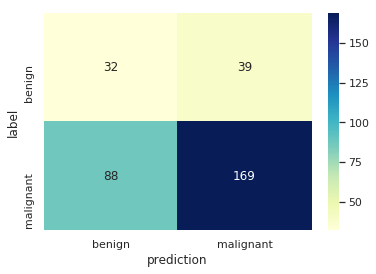

In [19]:
fig = plot_confusion_matrix(train, results)
fig.savefig("figures/{}-{}-train-confusion-matrix.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Train ROC curve

No handles with labels found to put in legend.


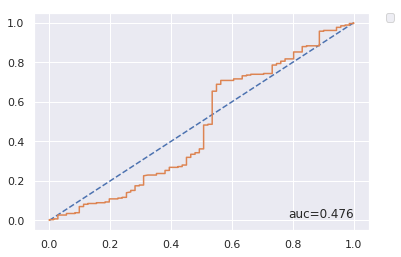

In [20]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-train-ROC-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Train precision-recall curve

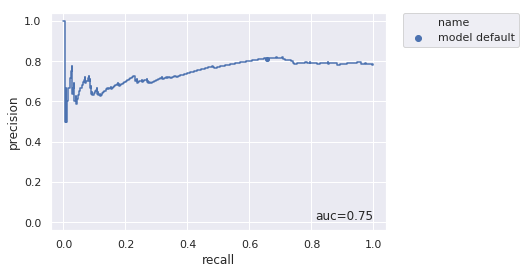

In [21]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-train-precisionrecall-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

# Validation

In [22]:
results = get_results(model, validation)

In [23]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(validation)
pm.record("validation_labels", list(labels))
pm.record("validation_probabilities", list(probabilities))
pm.record("validation_predictions", list(predictions))

## Validation statistics

In [24]:
loss, accuracy = calculate_accuracy_loss(model, validation)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.5434782621653184
Loss: 0.6326525263164354


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
benign,0.543,7,43,30,12,0.368,0.589,0.189,0.782,0.411,0.632,0.811,0.479,0.466
malignant,0.543,43,7,12,30,0.589,0.368,0.782,0.189,0.632,0.411,0.218,0.479,0.466


## Validation confusion matrix

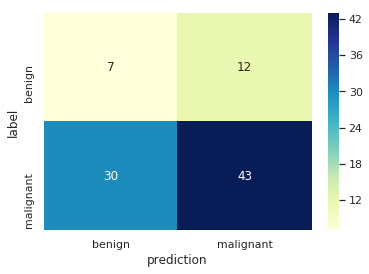

In [25]:
fig = plot_confusion_matrix(validation, results)
fig.savefig("figures/{}-{}-validation-confusion-matrix.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Validation ROC curve

No handles with labels found to put in legend.


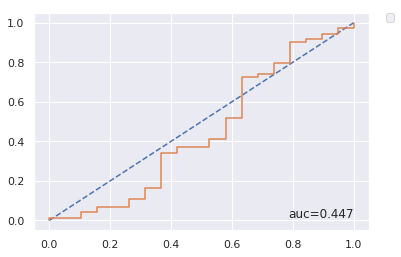

In [26]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-validation-ROC-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Validation precision-recall curve

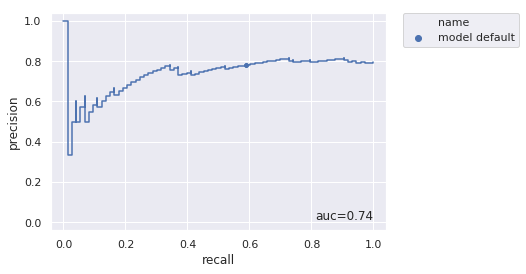

In [27]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-validation-precisionrecall-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

# Test

In [28]:
results = get_results(model, test)

In [29]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(test)
pm.record("test_labels", list(labels))
pm.record("test_probabilities", list(probabilities))
pm.record("test_predictions", list(predictions))

## Test statistics

In [30]:
loss, accuracy = calculate_accuracy_loss(model, test)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.7021276671835717
Loss: 0.5588828540862875


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
benign,0.702,7,26,11,3,0.700,0.703,0.389,0.897,0.297,0.300,0.611,0.701,0.701
malignant,0.702,26,7,3,11,0.703,0.700,0.897,0.389,0.300,0.297,0.103,0.701,0.701


## Test confusion matrix

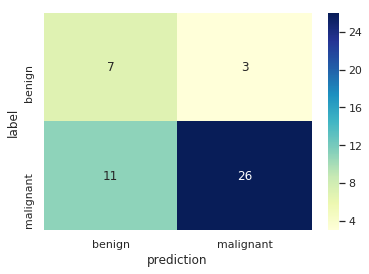

In [31]:
fig = plot_confusion_matrix(test, results)
fig.savefig("figures/{}-{}-test-confusion-matrix.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Test ROC curve

No handles with labels found to put in legend.


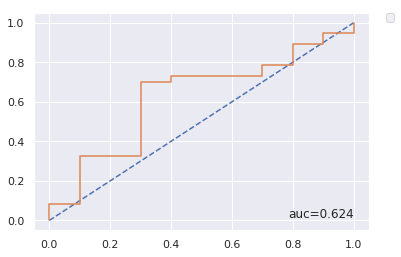

In [32]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-test-ROC-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

## Test precision-recall curve

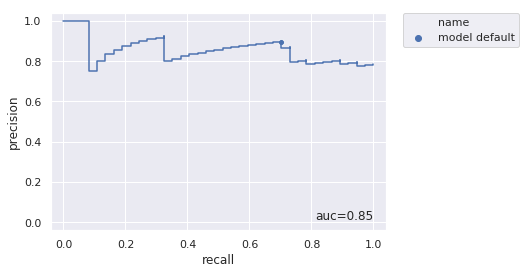

In [33]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-test-precisionrecall-curve.svg".format(result.description, result.input_form), bbox_inches = "tight")

In [34]:
import json
hyperparameters = json.loads(result.hyperparameters)
deep_top = hyperparameters["deep-dense-top"]
grad_cam_layer = "dense_3"
if deep_top: 
    grad_cam_layer = "dense_6"

# TSNE

In [35]:
if result.input_form != "features": 
    layer = "dense_1"
    if deep_top: 
        layer = "dense_3"
    tsne_dataset = train
    tsne_dataset.reset()
    fieldnames = ["histographic interpretation"]
    tsne_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, tsne_dataset))]
    figs = plot_tsne(
        model, 
        layer, 
        tsne_dataset, 
        [tsne_results, tsne_dataset.labels], 
        fieldnames=["model output", *fieldnames], 
        perplexity=TSNE_PERPLEXITY,
    )
    for i, field in enumerate(["model output", *fieldnames]): 
        figs[i].savefig("figures/{}-{}-{}-tsne.svg".format(result.description, result.input_form, field.replace(" ", "-")), bbox_inches = "tight")
    tsne_dataset.reset()

# Grad Cam

In [36]:
def show_grad_cam_images(images, labels, predictions, names=None, penultimate_layer="res5c_branch2c", layer="dense_3", columns=2, include_label=True):
    filter_idx = [0]
    grad_modifier = None
    backprop_modifier = None
    penultimate_layer_idx = None
    if penultimate_layer:
        penultimate_layer_idx = find_layer_idx(model, penultimate_layer)    
    rows = int(math.ceil(len(images) * 2/columns))
    f, ax = plt.subplots(rows, columns, figsize=(5.5, 3 * rows))    
    ax = ax.flatten()
    for i, image in enumerate(images): 
        grad = visualize_cam(
            model,
            find_layer_idx(model, layer),
            filter_idx,
            normalize(image),
            penultimate_layer_idx=penultimate_layer_idx,
            backprop_modifier=backprop_modifier,
            grad_modifier=grad_modifier)
        if names is not None: 
            ax[2*i].set_title("{}".format(names[i]))
        ax[2*i].imshow(image)
        ax[2*i].axis('off')
        if include_label: 
            ax[2*i+1].set_title("label/pred: {}/{}".format(labels[i], predictions[i]))
        ax[2*i+1].imshow(overlay(grad, image))
        ax[2*i+1].axis('off')
    return f, ax

In [37]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
if grad_cam_dataset.parameters["t1"]: 
    show_grad_cam_images(grad_cam_dataset.t1, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, layer=grad_cam_layer)
    plt.show()
if grad_cam_dataset.parameters["t2"]: 
    show_grad_cam_images(grad_cam_dataset.t2, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, penultimate_layer="res5c_branch2c_t2", layer=grad_cam_layer)
    plt.show()

In [38]:
grad_cam_dataset = validation
grad_cam_dataset.reset()
grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
inv_indices = {v: k for k, v in grad_cam_dataset.class_indices.items()}

if SELECTIONS == None: 
    SELECTIONS = dict()

if grad_cam_dataset.parameters["t1"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t1
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])            
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, include_label=False, names=None, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])                
        fig.show()

if grad_cam_dataset.parameters["t2"]: 
    for k, v in SELECTIONS.items():
        images = grad_cam_dataset.t2
        selected_images = list()
        selected_labels = list()
        selected_results = list()
        for i, name in enumerate(grad_cam_dataset.names): 
            if name in v: 
                selected_images.append(images[i])
                selected_labels.append(grad_cam_dataset.labels[i])
                selected_results.append(grad_cam_results[i])
        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, names=None, penultimate_layer="res5c_branch2c_t2",include_label=False, layer=grad_cam_layer)
        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])        
        fig.show()

In [39]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')